In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

In [3]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [5]:
import os
os.listdir('names')[:10]

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt']

In [7]:
open('names/yob2010.txt','r').readlines()[:5]

['Isabella,F,22883\r\n',
 'Sophia,F,20612\r\n',
 'Emma,F,17322\r\n',
 'Olivia,F,17012\r\n',
 'Ava,F,15418\r\n']

In [8]:
names2010 = pd.read_csv('names/yob2010.txt')
names2010.head()

,Isabella,F,22883
0,Sophia,F,20612
1,Emma,F,17322
2,Olivia,F,17012
3,Ava,F,15418
4,Emily,F,14260


In [9]:
names2010 = pd.read_csv('names/yob2010.txt',names=['name','sex','number'])

In [10]:
names2010.head()

,name,sex,number
0,Isabella,F,22883
1,Sophia,F,20612
2,Emma,F,17322
3,Olivia,F,17012
4,Ava,F,15418


In [11]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [12]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [13]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [15]:
allyears_indexed.head()

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5

In [16]:
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index,data.values)

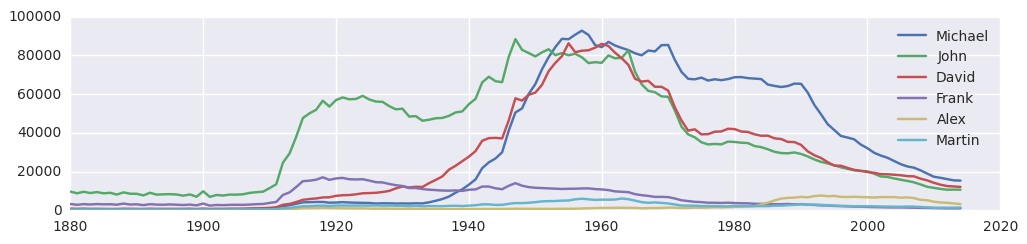

In [24]:
pp.figure(figsize=(12,2.5))

names = ['Michael','John','David','Frank','Alex','Martin']

for name in names:
    plotname('M',name)

pp.legend(names)

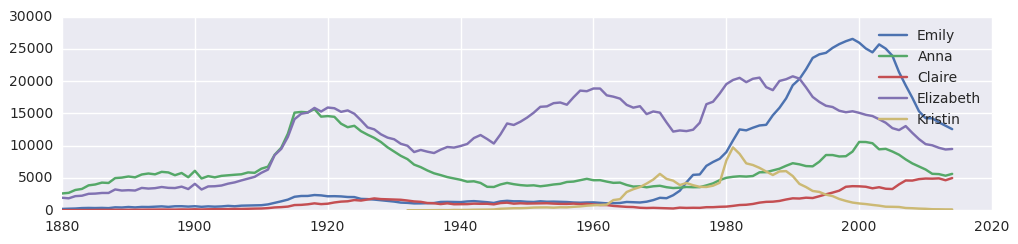

In [22]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Claire','Elizabeth','Kristin']

for name in names:
    plotname('F',name)

pp.legend(names)

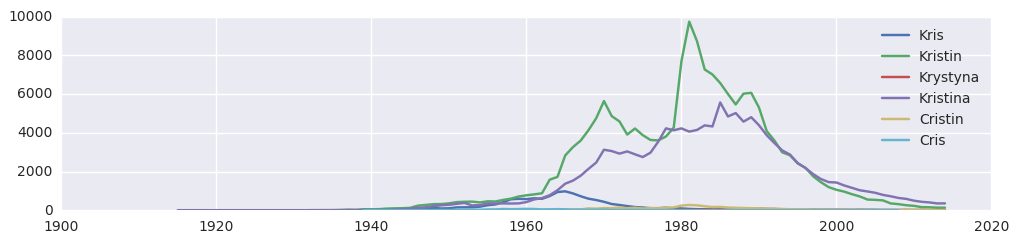

In [28]:
pp.figure(figsize=(12,2.5))

names = ['Kris','Kristin','Krystyna','Kristina','Cristin','Cris']

for name in names:
    plotname('F',name)

pp.legend(names)

In [29]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                                       
name   Cris Cristin Kris Kristin Kristina Krystyna
year                                              
1915    NaN     NaN  NaN     NaN      5.0      NaN
1920    NaN     NaN  NaN     NaN      5.0      NaN
1921    NaN     NaN  NaN     NaN      5.0      NaN
1932    NaN     NaN  NaN     7.0      NaN      NaN
1933    NaN     NaN  NaN     9.0      NaN      NaN

In [30]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                                       
name   Cris Cristin Kris Kristin Kristina Krystyna
year                                              
1915    0.0     0.0  0.0     0.0      5.0      0.0
1920    0.0     0.0  0.0     0.0      5.0      0.0
1921    0.0     0.0  0.0     0.0      5.0      0.0
1932    0.0     0.0  0.0     7.0      0.0      0.0
1933    0.0     0.0  0.0     9.0      0.0      0.0

In [31]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).tail()

number                                        
name   Cris Cristin  Kris Kristin Kristina Krystyna
year                                               
2010    0.0    16.0  16.0   228.0    495.0      6.0
2011    0.0     9.0  15.0   163.0    437.0     12.0
2012    0.0     8.0  11.0   155.0    406.0      5.0
2013    0.0     5.0  19.0   137.0    353.0      0.0
2014    0.0     6.0  17.0   133.0    357.0      5.0

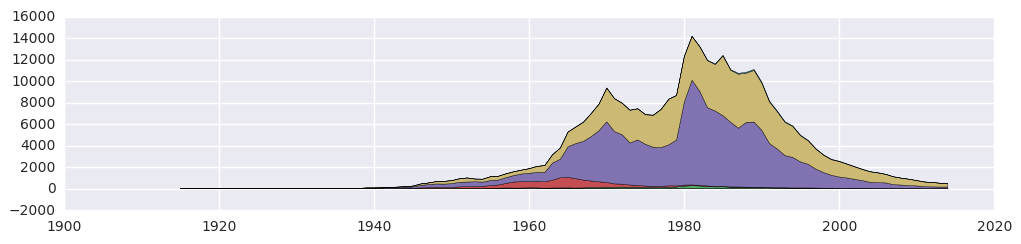

In [33]:
pp.figure(figsize=(12,2.5))
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)
pp.stackplot(variants.index,variants.values.T,label=names)

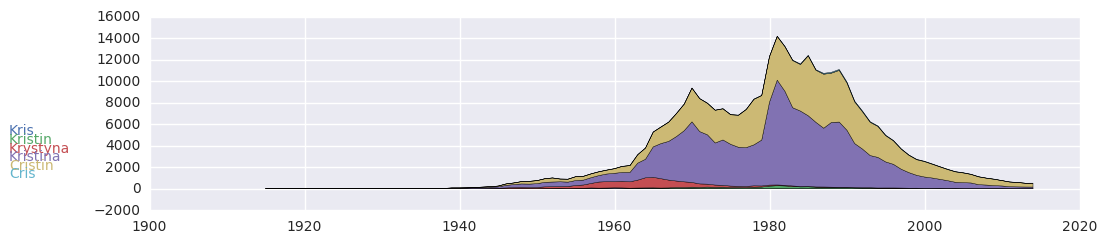

In [35]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    pp.text(1882,5000 - 800*i,name,color=palette[i])

In [40]:
allyears_indexed.loc['M',:,1996].sort_values('number',ascending=False).head()

number
sex name        year        
M   Michael     1996   38364
    Matthew     1996   32072
    Jacob       1996   31912
    Christopher 1996   30900
    Joshua      1996   29167

In [44]:
def topten(sex,year):
    simple = allyears_indexed.loc[sex,:,year].sort_values('number',ascending=False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [45]:
def toptens(sex,year0,year1):
    years = [topten(sex,year) for year in range(year0,year1+1)]
    
    return years[0].join(years[1:])

In [46]:
toptens('M',2000,2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [47]:
toptens('F',2000,2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emma,Isabella,Isabella
2,Hannah,Madison,Madison,Emma,Emma,Emma,Emma,Isabella,Isabella,Emma,Sophia
3,Madison,Hannah,Hannah,Madison,Madison,Madison,Madison,Emma,Emily,Olivia,Emma
4,Ashley,Ashley,Emma,Hannah,Olivia,Abigail,Isabella,Ava,Olivia,Sophia,Olivia
5,Sarah,Alexis,Alexis,Olivia,Hannah,Olivia,Ava,Madison,Ava,Ava,Ava
6,Alexis,Sarah,Ashley,Abigail,Abigail,Isabella,Abigail,Sophia,Madison,Emily,Emily
7,Samantha,Samantha,Abigail,Alexis,Isabella,Hannah,Olivia,Olivia,Sophia,Madison,Abigail
8,Jessica,Abigail,Sarah,Ashley,Ashley,Samantha,Hannah,Abigail,Abigail,Abigail,Madison
9,Elizabeth,Elizabeth,Samantha,Elizabeth,Samantha,Ava,Sophia,Hannah,Elizabeth,Chloe,Chloe
10,Taylor,Olivia,Olivia,Samantha,Elizabeth,Ashley,Samantha,Elizabeth,Chloe,Mia,Mia


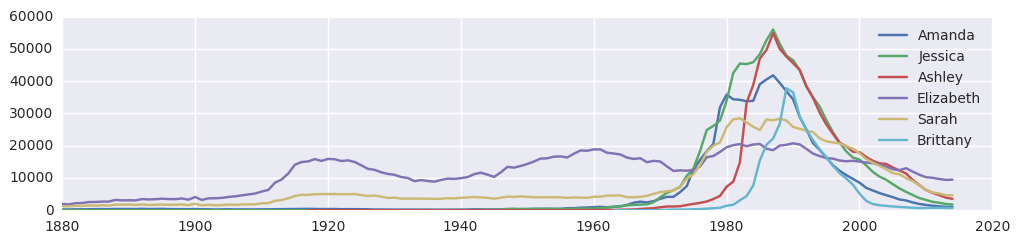

In [49]:
pp.figure(figsize=(12,2.5))

for name in toptens('F',1985,1995).stack().value_counts().index[:6]:
    plotname('F',name)
    
pp.legend(toptens('F',1985,1995).stack().value_counts().index[:6])

In [50]:
totals = allyears.groupby(['sex','name'])['number'].sum()

In [51]:
totals_bysex = totals.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [52]:
totals_both = totals_bysex.sum(axis = 1)

In [54]:
ratio = totals_bysex['F'] / totals_bysex['M']
unisex = (ratio > 0.25) & (ratio < 4)
totals_both = totals_both[unisex]
totals_both.sort_values(ascending=False)
totals_both.head(5)

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
dtype: float64

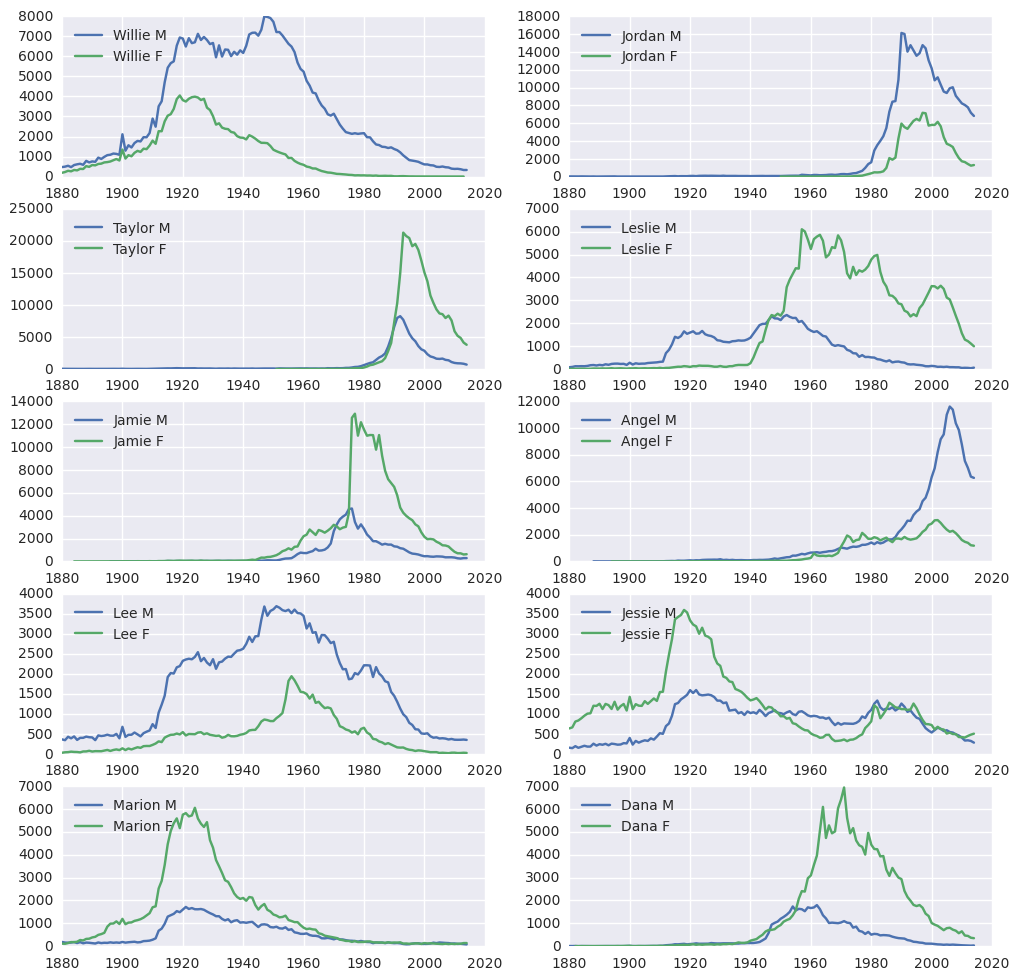

In [55]:
names = totals_both.head(10).index.values

pp.figure(figsize=(12,12))

for i,name in enumerate(names):
    pp.subplot(5,2,i+1)
    
    plotname('M',name)
    plotname('F',name)
    
    pp.legend([name + ' M',name + ' F'],loc='upper left')